# Visualization of inversion - Diorama data

In [150]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [151]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

In [152]:
mypath = 'tfa_inversion/inc-71_dec-23_r500_int15_z050_dz700/'

In [153]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

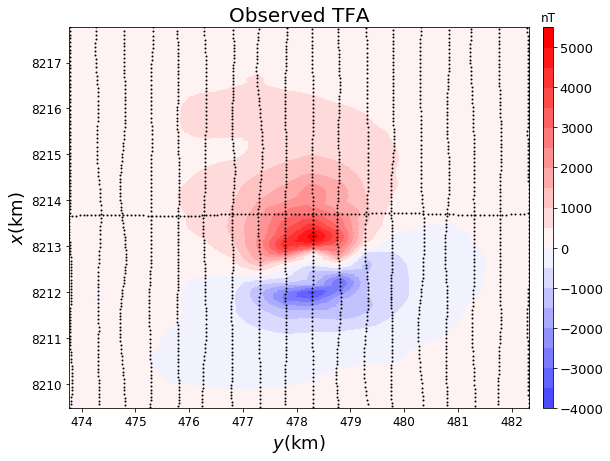

In [154]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='bwr', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
plt.plot(di['yp'], di['xp'], 'ok', markersize=1)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'diorama_real_data.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

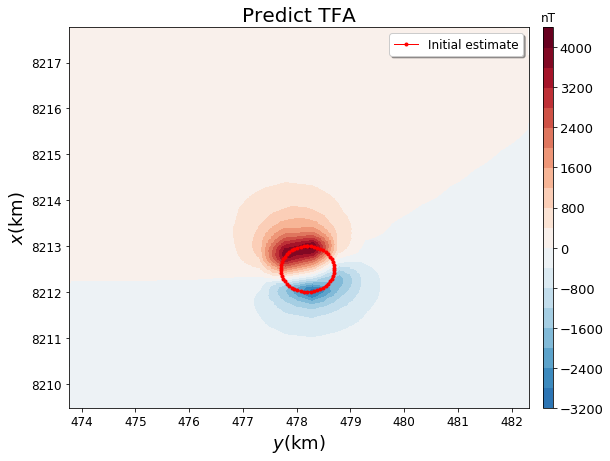

In [155]:
plt.figure(figsize=(10,7))
plt.title('Predict TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['initial_data'])*(-1), vmax=np.max(di['initial_data']))
plt.tricontourf(di['yp'], di['xp'], di['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(di['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_pred_data_true_inital.png', width=1000, height=1200)

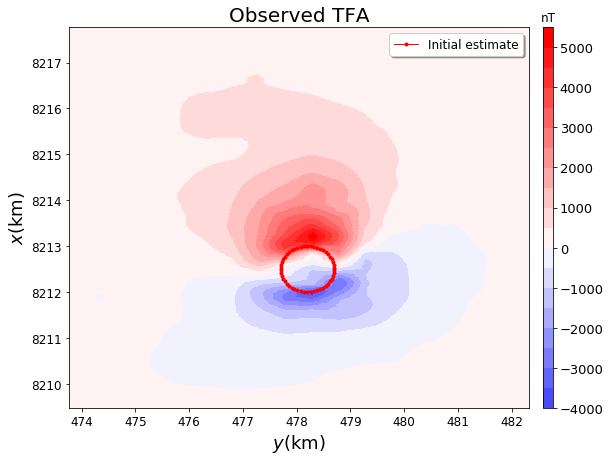

In [156]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='bwr', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(di['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_obs_data_true_inital.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_obs_data_true_inital.png', width=1000, height=1200)

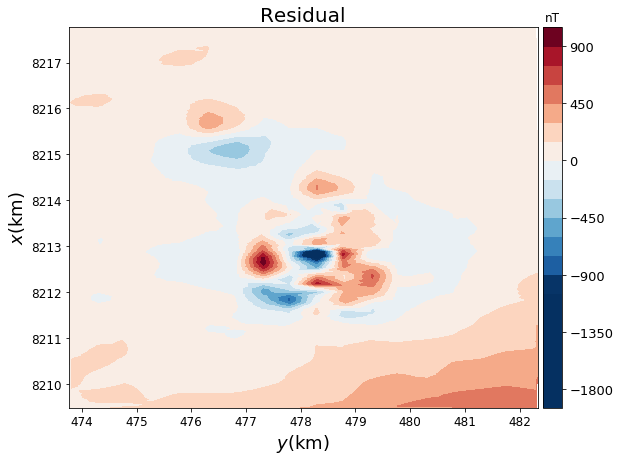

In [157]:
plt.figure(figsize=(10,7))
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['residual'])*(-1), vmax=np.max(di['residual']))
plt.tricontourf(di['yp'], di['xp'], di['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'diorama_tfa_residual.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

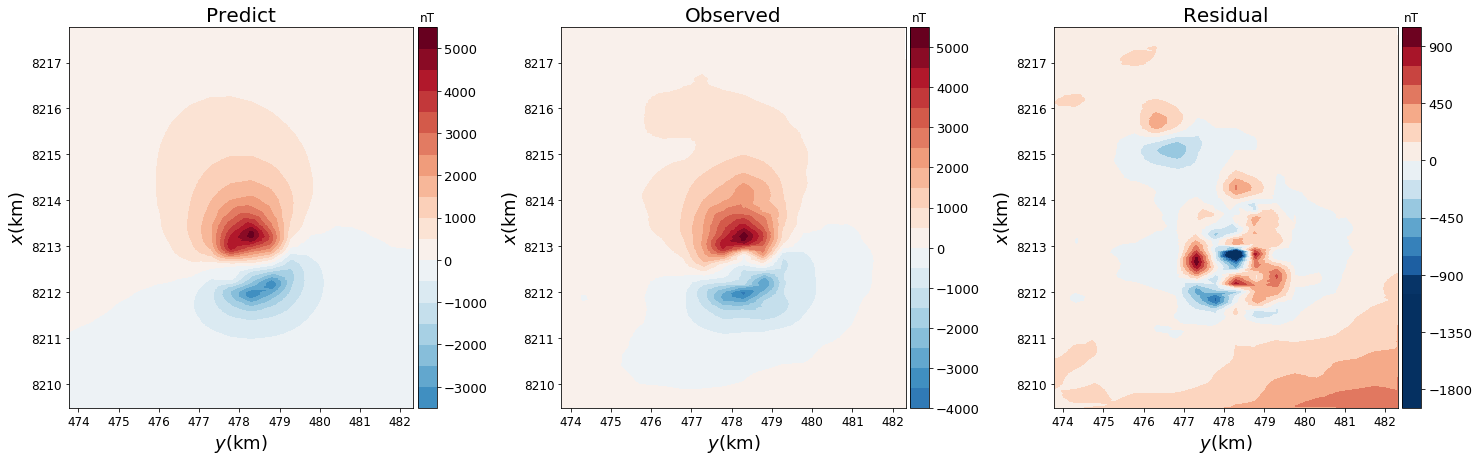

In [158]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['residual'])*(-1), vmax=np.max(di['residual']))
plt.tricontourf(di['yp'], di['xp'], di['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'diorama_tfa_fit.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_tfa_fit.png', width=1600, height=400)

/home/leonardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


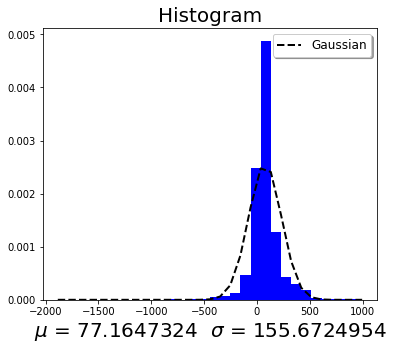

In [159]:
mean = np.mean(di['residual'])
std = np.std(di['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=30
n, bins, patches = plt.hist(di['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_hist.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_hist.png', width=400, height=400)

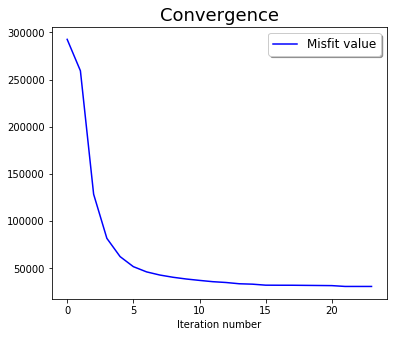

In [160]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'diorama_tfa_convergence.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_convergence.png', width=400, height=400)

In [161]:
bounds = [8209000., 8217000., 475000., 482000., -100., di['estimate'][-1]*len(di['prisms']) + di['z0']]

red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure()
#myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(di['prisms'], 'magnetization', color=red, linewidth=1.)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.5
scene.scene.camera.position = [-0.089204656936016313, -0.066107174155361687, -0.04083578885723696]
scene.scene.camera.focal_point = [1.1820671636724554e-16, 1.3134079596360617e-17, -1.9701119394540926e-17]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.24683390337942718, 0.24593292331329802, -0.93733132955911114]
scene.scene.camera.clipping_range = [0.057117737884348194, 0.1956040854922288]
scene.scene.camera.compute_view_plane_normal()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
#myv.savefig(mypath+'diorama_tfa_bolacha1.png')
myv.show()

In [162]:
x = di['xp']/1000.
y = di['yp']/1000.
z = di['zp']/1000.

for i in range(len(di['prisms'])):
    di['prisms'][i].x /= 1000.
    di['prisms'][i].y /= 1000.
    di['prisms'][i].z1 /= 1000.
    di['prisms'][i].z2 /= 1000.
verts = mfun.plot_prisms(di['prisms'])

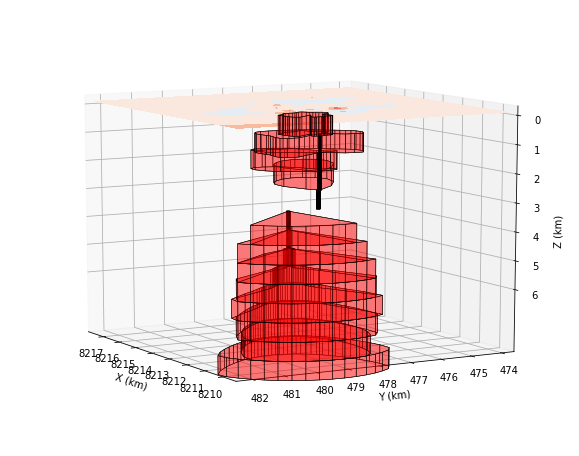

In [163]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(x), np.max(x), 100)
ax.set_ylim(np.min(y), np.max(y), 100)
ax.set_zlim(8, -0.150, 100)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.view_init(10, 150)
ax.set_xticks(np.linspace(np.min(x), np.max(x), 5), minor=True)
ax.set_yticks(np.linspace(np.min(y), np.max(y), 5), minor=True)
ax.set_zticks(np.linspace(6, 0, 6), minor=True)

norm=mpb.colors.Normalize(vmin=np.min(di['residual']), vmax=np.min(di['residual'])*(-1))
ax.tricontourf(x, y, di['residual'],
                zdir='z', offset=-0.100, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_estimate.png', dpi=300)
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)